#**Image Compression Using K-means**

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from utils import *

### Defining Function for K-Means

In [ ]:
def find_closest_centroids(X, centroids):


    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
        distance = []
        for j in range(K):
            # Euclidean distance between X[i] and centroids[j]
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)

        # Index of the closest centroid
        idx[i] = np.argmin(distance)


    return idx

In [ ]:
def compute_centroids(X, idx, K):
    #variables
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        # Select all points assigned to cluster k
        points = X[idx == k]

        # Compute mean of those points
        if len(points) > 0:
            centroids[k] = np.mean(points, axis=0)

    return centroids

def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):
    # Plot the examples
    plot_data_points(X, idx)

    # Plot the centroids as black 'x's
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', linewidths=3)

    # Plot history of the centroids with lines
    for j in range(centroids.shape[0]):
        draw_line(centroids[j, :], previous_centroids[j, :])

    plt.title("Iteration number %d" %i)

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):


    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):

        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))

        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)

        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show()
    return centroids, idx

def kMeans_init_centroids(X, K):

    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])

    # Take the first K examples as centroids
    centroids = X[randidx[:K]]

    return centroids


### Loading Image

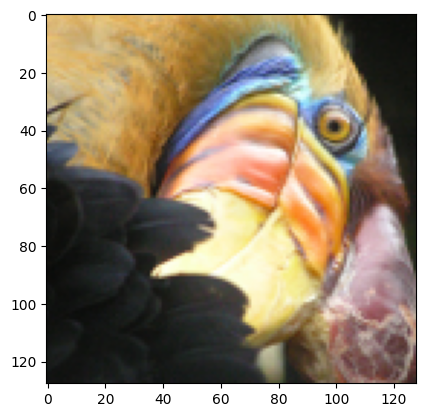

In [41]:
image = plt.imread("bird_small.png") # bird image loaded
plt.imshow(image)

In [42]:
image.shape

(128, 128, 3)

This is a 128 x 128 x 3 pixels picture, The first two indices identify a pixel position, and
the third index represents red, green, or blue.





In [43]:
img = np.reshape(image, (image.shape[0] * image.shape[1], 3))
#The code below reshapes the matrix original_img to create an  𝑚×3matrix of pixel colors (where  𝑚=16384=128×128)

-------------------

K-Means on image pixels



In [46]:
K = 16
max_iters = 10
initial_centroids = kMeans_init_centroids(X_img, K) # imported pre-defined functions
# Running K-Means
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [48]:
print("Shape of idx:", idx.shape)  # 128 * 128 = 16384
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [1 7 7 1 1]


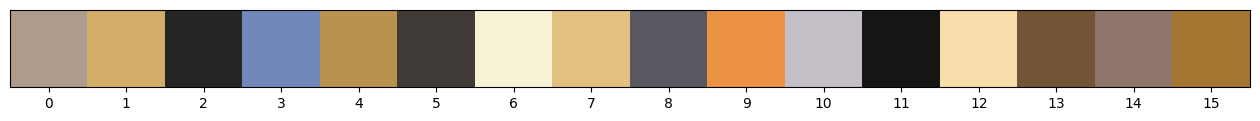

In [50]:
# Visualize the 16 colors selected
show_centroid_colors(centroids)

In [52]:
# --The original image required 24 bits (i.e. 8 bits x 3 channels in RGB encoding) for each one of the  128×128 pixel locations,
#       resulting in total size of  128×128×24=393,216 bits.
# --The new representation requires some overhead storage in form of a dictionary of 16 colors, each of which require 24 bits,
#       but the image itself then only requires 4 bits per pixel location.
# --The final number of bits used is therefore  16×24+128×128×4=65,920 bits, which corresponds to compressing the original
#       image by about a factor of 6.

In [54]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :]

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, image.shape)

## Displaying images (before-after)

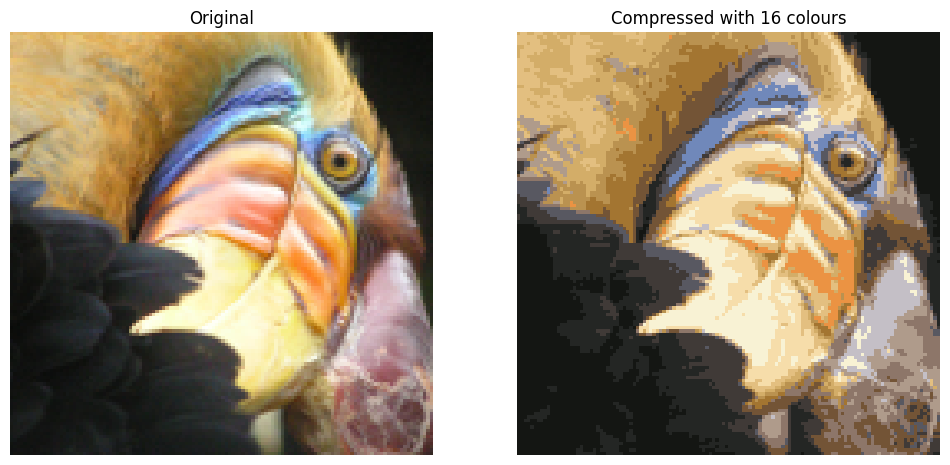

In [59]:
# original image
fig, ax = plt.subplots(1,2, figsize=(12,12))
plt.axis('off')

ax[0].imshow(image)
ax[0].set_title('Original')
ax[0].set_axis_off()


# compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with 16 colours')
ax[1].set_axis_off()

## ***You can view the effects of the compression by reconstructing the image based only on the centroid assignments.***

-Rushabh mowade